In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import transform, io

In [3]:
def get_heatmap(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = ndimage.gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [4]:
def combine(image, heat_map, alpha=0.5, display=False, save=None, cmap='viridis', axis='on'):

    height = image.shape[0]
    width = image.shape[1]
    # resize heat map
    heat_map_resized = transform.resize(heat_map, (height, width))
    # normalize heat map
    max_value = np.max(heat_map_resized)
    min_value = np.min(heat_map_resized)
    normalized_heat_map = (heat_map_resized - min_value) / (max_value - min_value)
    # display image
    plt.imshow(image)
    plt.imshow(255 * normalized_heat_map, alpha=alpha, cmap=cmap)
    plt.axis(axis)
    if display:
        plt.show()
    if save is not None:
        plt.savefig(save)

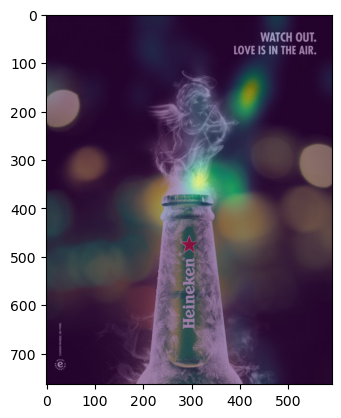

save image: eyes_on_beer


<Figure size 640x480 with 0 Axes>

In [5]:
cols = ['timestamp', 'x', 'y']
df = pd.read_csv('Heineken.csv', sep=';', names=cols, header=None)
image = io.imread('Heineken.jpg')
if not df.empty:
    x = df['x'].to_numpy()
    y = df['y'].to_numpy()
heatmap = get_heatmap(x, y, 16, bins=500)[0]
fliped_heatmap = np.flip(heatmap, 0)
combine(image, fliped_heatmap, display=True, save='eyes_on_beer', verbose=True)